# Aprendizaje de Maquinas  -- R -- Métodos de Clustering.
Notas de clase sobre aprendizaje de maquinas usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre regresión logistica usando **R** en el contexto de aprendizaje de maquinas. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

> Haga clic [aquí](https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-1-base.ipynb) para ver el tutorial de visualización y gráficas.

#### Contenido

> 
* [Segmentación-Clustering](#Segmentación-Clustering)
    * [Normalización](#Normalización)
    * [Distancias](#Distancias)
    * [K-Means](#K-Means)
    * [Aplicación-crimenes](#Aplicación-crimenes)
    * [Aplicación life-expectancy](#Aplicación-life-expectancy)
* [Clustering Aglomerativo-Clustering Jerarquico](#Clustering-Aglomerativo-Clustering-Jerarquico)
    * [Aplicación 1-CA](#Aplicación-1-CA)
    * [Aplicación 2-CA](#Aplicación-2-CA)
  


**Bibliografía**.

>  

**Material complementario.**
> Webinar RStudio [Getting your data into R](https://www.rstudio.com/resources/webinars/getting-your-data-into-r/) 

---



# Segmentación-Clustering
[Contenido](#Contenido)


El análisis no-supervisado de segmentación (clustering) hacen referencia a los algortimos que son ideados para producir un grupo homogéneo de un conjunto de observaciones sin identificar sus grupos o tener previamente casos similares con grupo de pertenencia. Por lo tanto, su objetivo es encontrar la estructura subyacente de los datos a partir de similaridades entre estos. Luego, se define un cluster como un grupo de observaciones que son similiares entre ellos dentro de cluster a partir de sus características. Las características entre cada comparación de clusters debe ser heterogenea para lograr una buena segmentacion de las observaciones.

Los algoritmos de cluster utilizan medidas de distancia entre los datos con el fin de encontrar aquellos que son muy cercanos (similares). Esto es relevante ya que las características de las observaciones deben estar en una escala común para tener distancias comparables, por lo tanto es importante transformar los datos según alguna medida de normalización antes de aplicar un algoritmo de clustering.

## Normalización
[Contenido](#Contenido)

Existen varias técnicas de normalizar los datos:

1. **Escala común**: Cuando se traten de características comparables por alguna medida común, llevar todo a una misma escala o unidad de medición. Ejemplo: Transformar todo a centimetros, grados Farenheit, Newtons, etc.


2. **Normalización Min-Max**: Se transforma cada observación restandole el menor valor de todos los datos y se divide entre la diferencia del máximo y el mínimo. $$ \frac{x-min(x)}{max(x)-min(x)} $$


3. **Normalización Z**: Se transforma cada observación restandole la media de los datos y diviendo por la desviación estándar. $$ \frac{x-\mu(x)}{\sigma(x)} $$


4. **Ratio tf-idf**: Cuando se utilizan variables de string dentro de cuerpos de documentos, se calcula el ratio de frecuencia de aparición de cada termino relativo al total de palabras en el documento multiplicado por la razón entre el numero total de documentos y la inversa del numero de docuemtnos con el string. Defina $t$ el término en cuestión, $d$ un documento específico, $D$ el cuerpo (conjunto) de todos los $N$ documentos y $f(t,d)$ la frecuencia de $t$ en $d$. Luego, $$ Ratio_{tfidf}= (1+log(f(t,d))) · log(\frac{N}{{d \in D: t \in d}})$$


## Distancias
[Contenido](#Contenido)

Las distancias juegan un papel importante en el algoritmo de clustering ya que a partir de estas se definen los k centroides de los clusters. Por lo tanto, hay varias formas de calcular las distancias. En general no existe una mejor medida entre ellas, todo depende del problema que se esté modelando.

1. **Distancia Euclidiana**: Es la distancia más utilizada en los algortimos de clustering, basada en planos dimensionales se define como la raíz de la suma de las diferencias al cuadrado. $$ \sqrt{\sum_{i=1}^{n}(p_{i}-q_{i})^2} $$

2. **Distancia Manhattan**: Se define como la suma de las diferencias en valor abosluto. $$ \sum_{i=1}^{n} \mid{p_{i}-q_{i}} \mid $$

3. **Similaridad geométrica (coseno)**: Se calcula como la razón entre el producto punto de las dimensiones consideradas y el producto de las raices de la sumas de los valores al cuadrado. Es muy utilizada en minería de texto y obtención de la información. $$ \frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}}\sqrt{\sum_{i=1}^{n} B_{i}}} $$

4. **Coeficiente de Correlación**: Esta medida solo se puede usar en dos dimensiones, y se define como la razón entre la suma de la suma de desviaciones cruzadas y el producto de las raices de las sumas de desviaciones al cuadrado. 

$$ \frac{\sum_{i=1}^{n} (x_{i}-\hat{x})(y_{i}-\hat{y}}{\sqrt{\sum_{i=1}^{n} (x_{i}-\hat{x})^2} \sqrt{\sum_{i=1}^{n} (y_{i}-\hat{y})^2}     } $$

5. **Indice Jaccard**: Este indice mide la similaridad entre dos conjuntos, por lo tanto se utiliza para atributos categóricos. Se calcula como la división del numero de elementos que son comunes entre los dos conjuntos sobre la suma de los elementos que son unicos en cada uno de los conjuntos. $$ \frac{\mid{A \cap B}\mid}{\mid{A \cup B}\mid} $$

## K-Means

[Contenido](#Contenido)

El algoritmo k-means es el más conocido de los algortimos de segmentación, es un algortimo de partición que produce k clusters (parametro introducido por el modelador) con datos similares entre el cluster y hetereogeneos entre cada cluster. 

El algoritmo empieza aleatoriamente iniciando los centroides de cada cluster (los valores de las características). Posteriormente, el proceso apunta a crear clusters homogéneos en un proceso iterativo hasta que encuentra una solución satisfactoria. En cada paso, se calculan las distancias de los puntos a los centroides y se asigna al más cercano. Luego, se reajusta el centroide con la media de las características de todos las observaciones asignadas. El proceso sigue hasta que las distancias de los puntos al cluster correspondiente no disminuyen más. La convergencia del algoritmo depende de los valores iniciales aleatorios.

<img src="images/kmean.png" height="500" width="500">

<img src="images/kmeans2.png" height="500" width="500">

## Aplicación-crimenes
[Contenido](#Contenido)

La librería `cluster.datasets` sirve para explorar los conceptos explicados anteriormente. Para esta aplicación, se exploran los datos de los crimenes ocurridos en las diferentes ciudades de USA en 1970 donde primero se escalan los datos a una métrica común con el fin que sean interpetables para el análisis de clustering.

> [`cluster.dataset {cluster.dataset}`](https://cran.r-project.org/web/packages/cluster.datasets/cluster.datasets.pdf) 

> [`kmeans {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/kmeans.html) 

In [5]:
## Instale y cargue la libraría de los dataset
library(cluster.datasets)                  


In [6]:
## Datos de crimen
data(all.us.city.crime.1970)               # Cargar el dataset de crimenes
crime <- all.us.city.crime.1970            # Llamar los datos "crime"

## Exploración de la data
names(crime)                               # Nombres de los campos
head(crime)                                # Primeros seis registros
summary(crime)                             # Resumen de los datos

[1] "city"             "population"       "white.change"     "black.population"
 [5] "murder"           "rape"             "robbery"          "assault"         
 [9] "burglary"         "car.theft"

city,population,white.change,black.population,murder,rape,robbery,assault,burglary,car.theft
Anaheim,1420,50.8,39,2.7,21.9,94,103,1607,377
Baltimore,2071,-21.4,501,13.2,34.9,564,396,1351,701
Boston,2754,-16.5,151,4.4,14.8,136,95,1054,984
Buffalo,1349,-20.7,118,5.7,13.7,145,111,862,448
Chicago,6979,-18.6,1306,12.9,25.4,363,233,830,708
Cincinnatti,1385,-17.2,156,6.4,16.8,120,107,912,348


     city             population     white.change     black.population
 Length:24          Min.   : 1268   Min.   :-39.400   Min.   :  39.0  
 Class :character   1st Qu.: 1416   1st Qu.:-20.875   1st Qu.: 117.5  
 Mode  :character   Median : 2024   Median :-13.450   Median : 302.0  
                    Mean   : 2932   Mean   : -8.304   Mean   : 452.8  
                    3rd Qu.: 2923   3rd Qu.:  6.750   3rd Qu.: 585.5  
                    Max.   :11529   Max.   : 50.800   Max.   :2080.0  
     murder            rape          robbery         assault     
 Min.   : 2.600   Min.   : 5.70   Min.   : 53.0   Min.   : 63.0  
 1st Qu.: 4.400   1st Qu.:16.40   1st Qu.:142.8   1st Qu.:106.8  
 Median : 9.350   Median :20.20   Median :243.0   Median :157.0  
 Mean   : 9.188   Mean   :23.18   Mean   :277.9   Mean   :187.8  
 3rd Qu.:13.525   3rd Qu.:28.10   3rd Qu.:351.8   3rd Qu.:232.2  
 Max.   :18.400   Max.   :50.00   Max.   :665.0   Max.   :421.0  
    burglary      car.theft     
 Min.   

Observe que de las estadísticas de resumen de los datos alrededor de 2.500 crimenes se cometieron para 10.000 residentes, donde quiere decir que alrededro de 2.5 porciento de la población estuvo involucrada en algún crimen como víctima. 

Observe si las ciudades difieren en su nivel de crimenes. Por lo tanto grafique los campos del 5 al 10 con un grafico.

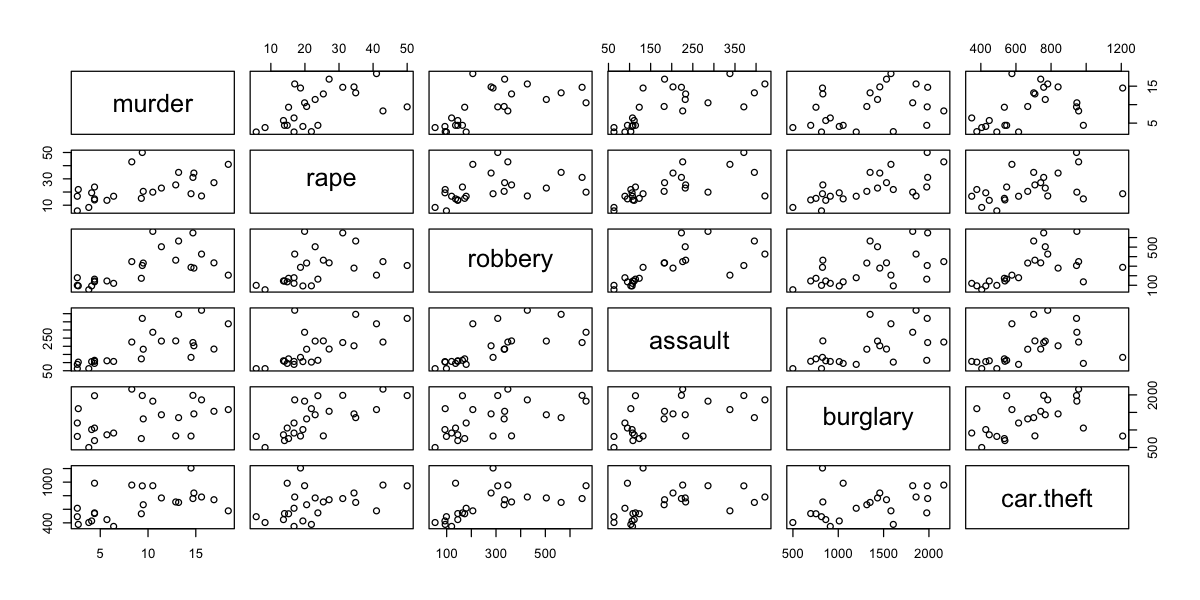

In [7]:
options(repr.plot.width=10, repr.plot.height=5)
plot(crime[5:10])

El grafico anterior muestra la relación que existe entre cada una de las variables donde la relación que hay entre asalto y homicidio es relevate. Esto anterior se valida con el cálculo de las correlaciones.

In [8]:
## Calcule la correlación redondeada a 3 decimales.
round(cor(crime[5:10]),3)                 # Función cor, calcula la correlación

,murder,rape,robbery,assault,burglary,car.theft
murder,1.000,0.526,0.638,0.709,0.353,0.495
rape,0.526,1.000,0.414,0.667,0.694,0.410
robbery,0.638,0.414,1.000,0.699,0.551,0.559
assault,0.709,0.667,0.699,1.000,0.596,0.428
burglary,0.353,0.694,0.551,0.596,1.000,0.382
car.theft,0.495,0.410,0.559,0.428,0.382,1.000


Para entender la técnica de *kmeans* realize segmentaciones progresivas con diferentes numeros de clusters. Recuede la importancia de normalizar la data dentro de los modelos de segmentación.

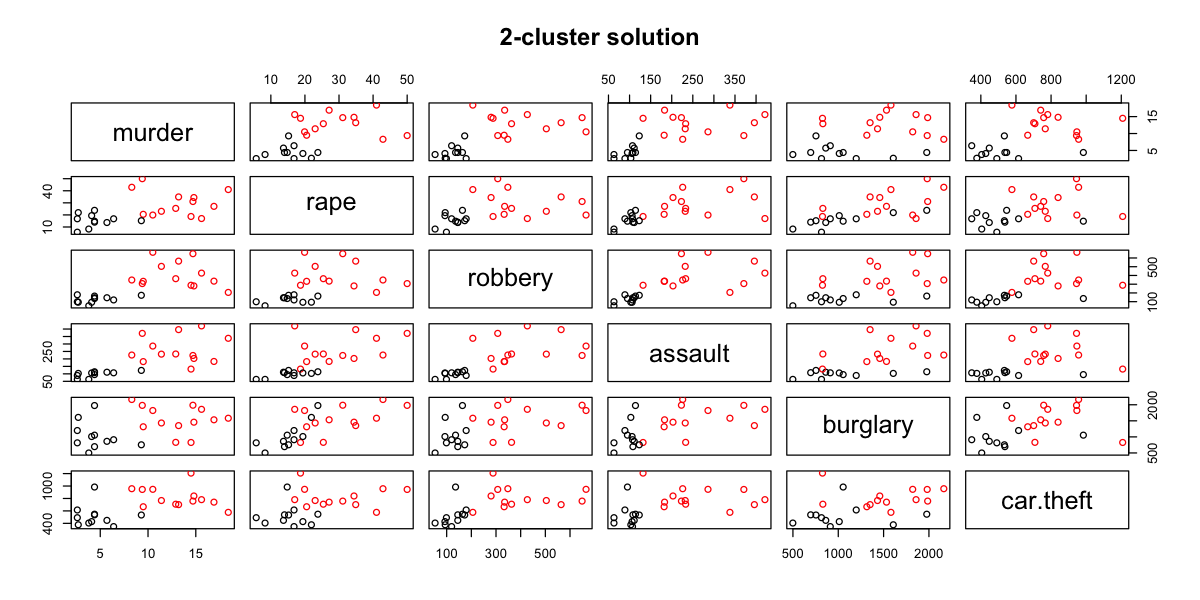

In [9]:
## Normalizacion de la data
crime.scale <- data.frame(scale(crime[5:10]))               # Función scale normaliza
set.seed(234)                                               # Semilla aleatoria

## Modelo kmeans con 2 clusters
TwoClusters <- kmeans(crime.scale,                          # Data normalizada del modelo kmeans
                     2,                                     # Numero de clusters
                     nstart = 25)                           # Repetir 25 veces el algoritmo para mayor robustez

## Grafico de los datos con los dos clusters

options(repr.plot.width=10, repr.plot.height=5)
plot(crime[5:10],                                           # Data original
     col=as.factor(TwoClusters$cluster),                    # Etiqueta de los cluster de cada registro
     main = "2-cluster solution")                           # Titulo del gráfico

Dentro de estos 2 clsuters es un poco mas sencillo realizar la distinción. Aquellas ciudades dento del cluster negro son las que presentan menor criminalidad, en cambio, las trojas tienen mayores índices de criminalidad.

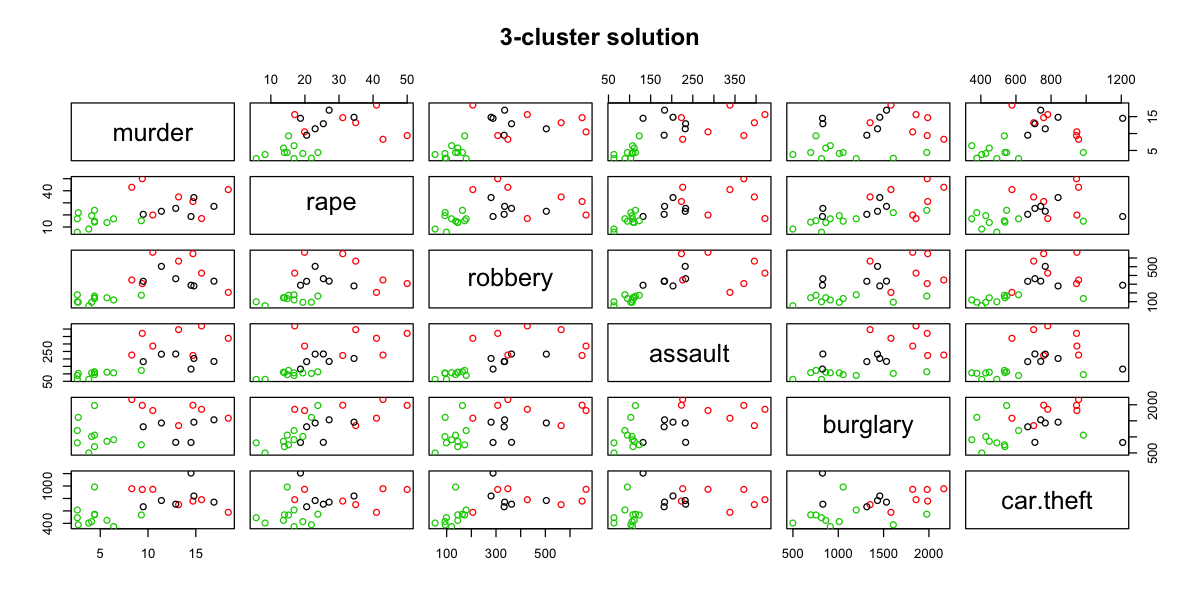

In [10]:
## Modelo kmenas con 3 clusters

ThreeClusters <- kmeans(crime.scale,                          # Data normalizada del modelo kmeans
                       3,                                     # Numero de clusters
                       nstart = 25)                           # Repetir 25 veces el algoritmo para mayor robustez

## Grafico de los datos con los tres clusters

options(repr.plot.width=10, repr.plot.height=5)
plot(crime[5:10],                                             # Data original
     col=as.factor(ThreeClusters$cluster),                    # Etiqueta de los cluster de cada registro
     main = "3-cluster solution")                             # Titulo del gráfico

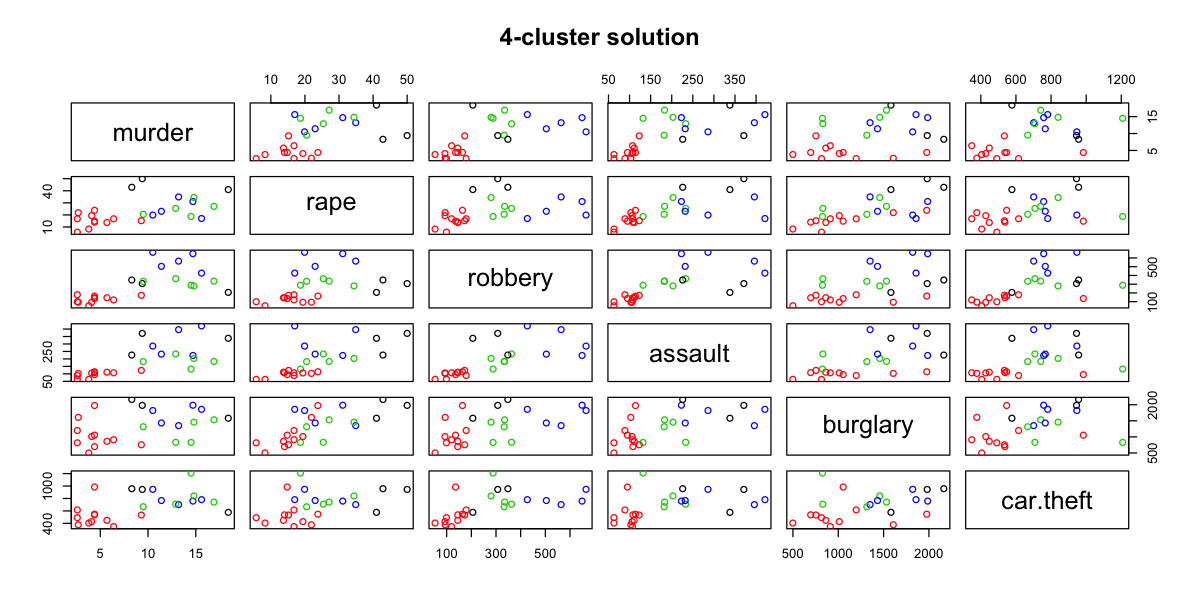

In [11]:
## Modelo kmeans con 4 clusters

FourClusters <- kmeans(crime.scale,                        # Data normalizada del modelo kmeans
                       4,                                  # Numero de clusters
                       nstart = 25)                        # Repetir 25 veces el algoritmo para mayor robustez

## Grafico de los datos con los cuatro clusters

options(repr.plot.width=10, repr.plot.height=5)
plot(crime[5:10],                                          # Data original
     col=as.factor(FourClusters$cluster),                  # Etiqueta de los cluster de cada registro
     main = "4-cluster solution")                          # Titulo del gráfico

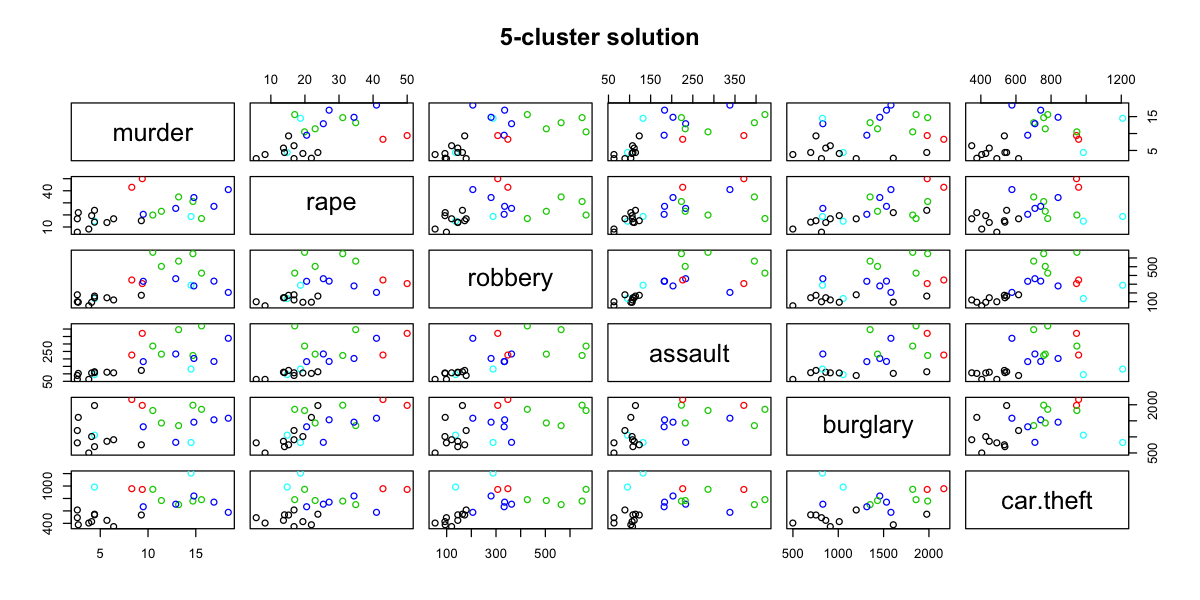

In [12]:
## Modelo kmeans con 5 clusters

FiveClusters <- kmeans(crime.scale,                         # Data normalizada del modelo kmeans
                       5,                                   # Numero de clusters
                       nstart = 25)                         # Repetir 25 veces el algoritmo para mayor robustez

## Grafico de los datos con los cinco clusters

options(repr.plot.width=10, repr.plot.height=5)
plot(crime[5:10],                                           # Data original
     col=as.factor(FiveClusters$cluster),                   # Etiqueta de los cluster de cada registro
     main = "5-cluster solution")                           # Titulo del gráfico

Puede ver que a medida que *k (número de clusters)* aumenta la complejidad de leer las segmentaciones aumenta, ya que se puede pensar que el modelo con 3 cluster son las ciudades con criminalidad "promedio" pero no es tan directa dicha interpretación. Por lo tanto, se vuelve más complejo con los 4 o 5 clusters.

Observe que un modelo kmeans recoge las características de la media para cada feature en cada cluster, es decir, los centroides, así como el SSE de cada cluster.

In [13]:
TwoClusters

K-means clustering with 2 clusters of sizes 11, 13

Cluster means:
      murder       rape    robbery    assault   burglary  car.theft
1 -0.9128346 -0.6991864 -0.8438639 -0.8328348 -0.5708682 -0.7166146
2  0.7723985  0.5916192  0.7140387  0.7047064  0.4830424  0.6063662

Clustering vector:
 [1] 1 2 1 1 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 2 1 1 2

Within cluster sum of squares by cluster:
[1] 18.39421 47.16265
 (between_SS / total_SS =  52.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Ahora calcule el ratio de diferencia para cada modelo expresado como la suma de error entre los clusters (BSS) y la suma total del error (TSS)

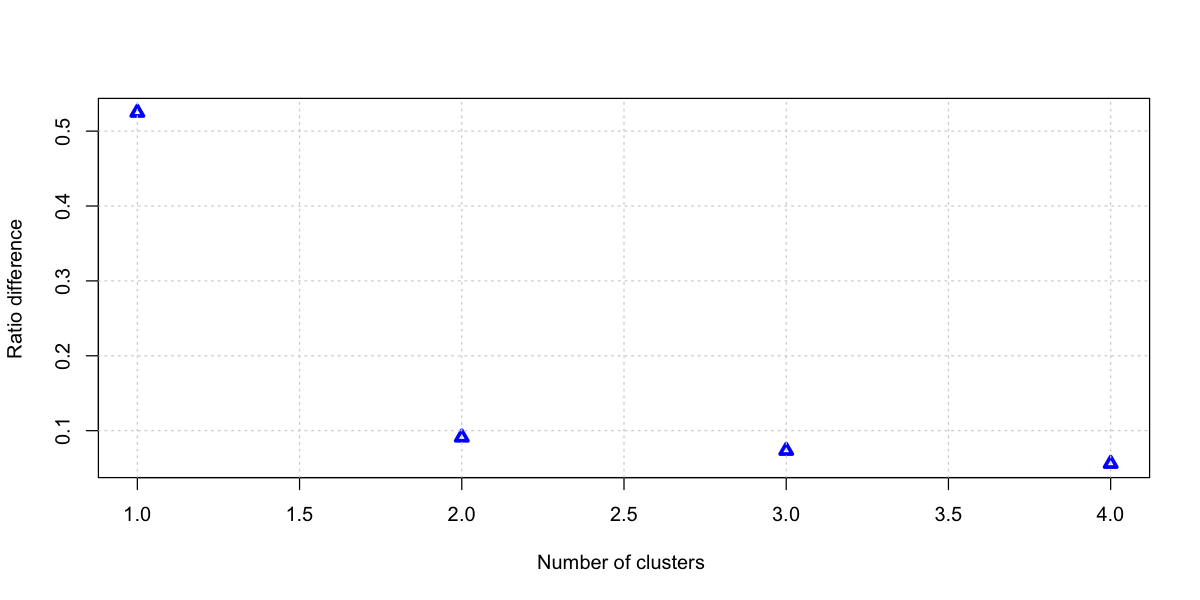

In [14]:
## Calcular el ratio de diferencia 
v    <-rep(0,4)                                              # Preparar el vector v de ratios
v[1] <- TwoClusters[[6]]/TwoClusters[[3]]                    # Primer elemento: BSS/TSS cluster 2
v[2] <- (ThreeClusters[[6]]/ThreeClusters[[3]]) - v[1]       # Segundo elemento: BSS/TSS cluster 3 menos elemento 1
v[3] <- (FourClusters[[6]]/FourClusters[[3]]) - sum(v[1:2])  # Tercer elemento: BSS/TSS cluster 4 menos elemento 2
v[4] <- (FiveClusters[[6]]/FiveClusters[[3]]) - sum(v[1:3])  # Cuarto elemento: BSS/TSS cluster 5 menos elemento 3

## Grafica

options(repr.plot.width=10, repr.plot.height=5)
plot(v,                                                       # Vector de ratios de diferencia
     xlab = "Number of clusters ",                            # Eje X: Número de clusters en el modelo
     ylab = "Ratio difference",                               # Eje Y: Ratio de diferencia
     pch=2,
     lwd=3,                    
     col="blue")

grid()

Observe como a medida que el número de clusters va aumentando, la disminución del error cuadrado va disminuyendo. Lo anterior puede indicar que a medida que se tienen más cluster mejora el ajuste del modelo, lo cual no es del todo cierto. Recuerde que un modelo con muchos números de clusters se vuelve poco parsimonioso, sesgado, complejo y poco interpetable, es por esto que se debe mantener un número de clusters óptimo.

## Aplicación life-expectancy
[Contenido](#Contenido)


Determinar el número de clusters es un paso muy importante dentro del proceso de modelación, por lo tanto en este ejemplo, utilice la base de datos de expectativa de vida (life.expectancy.1971) de la misma librería *cluster.datasets* para determinar el óptimo de clusters.

> [`NbClust {NbClust}`](https://cran.r-project.org/web/packages/NbClust/NbClust.pdf) 

In [15]:
## Instale y cargue las siguientes librerias
library(NbClust)              

ERROR: Error in library(NbClust): there is no package called ‘NbClust’


In [ ]:
## Carga de los datos
data(life.expectancy.1971)                      # Requiera la data           
life.expectancy.1971                            # Visualice la data

life     <-life.expectancy.1971[-c(23,24,27),]  # Remover los datos repetidos de Trinidad y USA
life$f50 <- unlist(lapply(life$f50,             # Aplicar la función as.numeric() a la columna f50
                         as.numeric))           # La función lapply devuelve una lista, por lo tanto se unlist.

Observe a priori que las mujeres tienen una mayor esperanza de vida que los hombres.

Se calcula la relación de la expectativa de vida que hay entre los hombres *(m)* y las mujeres *(f)* para añadir nuevas características (features) a los paises. Luego, se normaliza la data para poder ingresarla al modelo.

In [ ]:
## Calculo de la relación entre hombre y mujer.
life.temp   <- cbind(life,
                     life$m0/life$f0, 
                     life$m25/life$f25, 
                     life$m50/life$f50,
                     life$m75/life$f75)

## Normalización de los datos.
life.scaled <- as.matrix(data.frame( scale(life.temp[-(c(1,2))]) ))

En este paso, el análisis de clustering se realizará iterativamente donde varios modelos con diferentes numeros de clusters se evaluarán a partir de una metrica común y determinar el número ideal *k*.

In [ ]:
## Modelo kmeans con busqueda de clusters

options(repr.plot.width=10, repr.plot.height=5)
NbClust(life.scaled,            # Datos normalizado
        method = "kmeans")      # Método igual a kmeans 

Observe la salida de la función *NbClust*: los estadísticos de Humbert, valores de Dindex y un resumen de todos los índices que se probaron. En este caso el algoritmo dice que 10 de los índices dicen que 3 es el mejor número de clusters. En el segundo lugar, se encuentra k=15, con 7. No obstante, siendo 3 clusters la opción más votada y parsimoniosa, se escoge dicho *k*.

---

**Ejercicio.--** Utilice la base de datos del desempeño de los estudiantes publicada por Kaggle para identificar clusters de alumnos que presenten características similares dentro de su desempeño. Realice los gráficos correspondientes así como la caracterización de cada cluster. Adicional, realice conclusiones acerca de las caracteristicas que según el modelo de segmentación son candidatas a explicar el buen o mal resultado de un estudiante.

[Datos](https://drive.google.com/open?id=0B4psHlllKLPUZkhlSWFZanpDSmM)

**Ejercicio.--** A partir de la base de datos de encuestas de inclusión financiera de Colombia de los segmentos de personas con diferente nivel de inclusión se busca determinar campañas de crecimiento del sector financiero abarcando con diferentes campañas cada cluster de personas. 

Realice un modelo de clustering robusto que permita identificar las diferencias en la inclusión financiera de Colombia. Para esto debe ajustar el modelo, presentar gráficamente los clusters y las características media de cada uno y ajuste como medidas de impureza dentro de los clusters. Recuerde realizar conclusiones acerca de los grupos y posibles campañas de inclusión financiera.

[Datos](https://drive.google.com/file/d/0B4psHlllKLPUODZhQWJlaldQY1U/view?usp=sharing)

---

# Clustering Aglomerativo-Clustering Jerarquico

[Contenido](#Contenido)

A diferencia del clustering tradicional por particiones, el cual requiere un número k de clusters y crear k grupos homogeneos, el cluster jerarquico define los clusters desde la matriz de distancias de los datos y sin intervención del modelador. Este método es ideal cuando se entiende dentro del problema que los clusters pueden tener cierta jerarquia involucrada donde ciertos clusters pueden ser agrupamientos menores de mayores clusters (árbol de jerarquias).

El cluster jerarquico puede ser aglomerativo o divisivo. En el primero usualmente se calcula un número grande de clusters con clusters nodos hijos, por lo tanto se refiere a aquellos algoritmos que empiezan con un cluster para cada observación y empiezan a juntar observaciones iterativamente a partir de las similaridades de los datos hasta que existe solo un cluster para todas las observaciones. Dentro del clustering divisivo ocurre lo contrario, donde se empieza con un cluster que se van dividiendo iterativamente en dos a partir de las distancias de los datos.

<img src="images/hclust.jpg" height="600" width="600">

El clustering jerarquico proporciona varios métodos para su aplicación. El primero se conoce como el ***enlace único (single linkage)*** que calcula la proximidad de los clústeres como la menor distancia entre los puntos de los agrupamientos. El segundo metodo es el ***enlace completo (complete linkage)*** que calcula la distancia máxima entre los puntos del grupo. El tercer método es el ***enlace promedio (average linkage)*** que se basa en la distancia media de los puntos de un cluster a los puntos del otro. El último método es el de la ***varianza mínima de Ward (Ward's Minimun Variance)*** que agrupa reduciendo al mínimo la varianza alrededor de centroides en los clusters resultantes.

## Aplicación 1-CA
[Contenido](#Contenido)

Utilizando los datos del ejemplo anterior va a aplicar los conceptos aprendidos de clustering aglomerativo. Para ello se establece los nombres de las filas como el nombre de los paises de la esperanza de vida. Posteriormente, se realiza un clustering jerarquico con la función *hclust* y su gráfica.

> [`hclust {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/hclust.html) 

In [ ]:
## Pais como nombre de fila para la visualización
rownames(life.scaled) <- life$country    # Rownames: Establece el nombre de las filas

## Modelo clustering jerarquico
a <- hclust(dist(life.scaled))           # hclust: Clustering jerarquico; dist: Calcula la matriz de distancias

## Grafica del modelo

options(repr.plot.width=10, repr.plot.height=6)
plot(a,                                   # Grafica modelo de clustering
     hang=-1,                             # Posicion de las etiquetas debajo del plot
     xlab="Case number",                  # Titulo del eje x
     main = "Euclidean")                  # Titulo del gráfico

Dentro del gráfico, los clusters se representan por las particiones en cada rama del dendograma. Es decir, fíjese que Camerún y Madagascar las agrupa en un solo cluster a parte del resto, mientras que Algeria y Nicaragua se encuentran en un subcluster de un cluster más grande conformado además por Seychelles y Tunisia.

Por defecto, la función `dist` calcula distancias euclidianas. Se utiliza el método manhattan para calcular las distancias y se comparan la diferencias en el modelo de clustering.

In [ ]:
## Modelo cluster jerarquico
a <- hclust(dist(life.scaled,               # Datos normalizados
                method= "manhattan"))       # Metodo de distancias Manhattan

options(repr.plot.width=10, repr.plot.height=6)
plot(a,                                     # Modelo cluster
     hang=-1,                               # Nombres de los paises
     xlab="Case number",                    # Nombre del eje x
     main = "Manhattan")                    # Titulo del gráfico 

Los resultados pueden variar con distintas medidas de distancia aunque generalmente no son dramáticos no obstante hay casos donde la elección del método para determinar la proximidad del clúster también juega un papel importante en el agrupamiento. Dentro de este ejemplo, no existe razón alguna inferir que la distancia euclidiana o manhattan es la mejor medida de distancia para modelar, ya que esto depende de gran forma del problema y los datos que representan. 

## Aplicación 2-CA

[Contenido](#Contenido)

Se explorará los datos que representan los porcentajes de aceptación de los temas políticos en votación dentro del país de Suiza en el 2001. La filas representan los estados y las columnas, excepcto la primera, representa el tema de votación. 

In [ ]:
## Cargue de de los datos
link<-paste0("https://raw.githubusercontent.com/PacktPublishing/Learning-Predictive-Analytics-with-R/",  # Paste0 concatena strings sin separador
             "master/Data/Data%20Ch5/swiss_votes.dat")                                                   # Link de los datos

swiss_votes <- read.table(link,         # Link a los datos
                         sep = "\t",    # Separador de los datos
                         header = T)    # Datos con encabezados

head(swiss_votes)                       # Primeros 6 datos

Está interesado en encontrar agrupaciones en los comportamientos de votación para los estados de Suiza. Para esto, se utilizan los tres métodos en clustering aglomerativo: ***complete linkage, single y average***. Recuerde que el *complete linkage* genera clusteres compactos, mientras que el *single* es más inclusivo y el *average* es un intermedo entre los dos.

In [ ]:
## Modelos de clustering aglomerativo

dist_matrix  <- dist(swiss_votes[2:11])              # Matriz de distancias    

clust_compl  <- hclust(dist_matrix)                  # Clustering aglomerativo complete linkage

clust_single <- hclust(dist_matrix,                  # Clustering aglomerativo 
                          method = "single")         # Método Single

clust_ave    <- hclust(dist_matrix,                  # Clustering aglomerativo
                       method = "average")           # Metodo Average

clust_compl

In [ ]:
## Gráfica de los modelos de clustering

par(mfrow = c(3,1))                # Dividimos el gráfico en 3 partes

# Modelo Complete
plot(clust_compl,                  # Modelo de Clustering
     labels=swiss_votes$Canton,    # Estados de Suiza
     hang = -1,                    # Posición de los estados
     main = "Complete linkage",    # Titulo del gráfico
     xlab = "Canton",              # Titulo eje x
     ylab = "Distance")            # Título eje y

# Modelo Single
plot(clust_single, 
     labels=swiss_votes$Canton, 
     hang = -1,
     main = "Single linkage", 
     xlab = "Canton",
     ylab = "Distance")

# Modelo Average
plot(clust_ave, 
     labels=swiss_votes$Canton, 
     hang = -1,
     main = "Average linkage", 
     xlab = "Canton",
     ylab = "Distance")

Un factor importante es el método de realizar el clustering, ya que esto cambia los resultados de forma significativa. Una cosa que se podría pensar es que las opiniones compartidas entre estados se deben a proximidad geográfica, ya que la gente se comunica frecuentemente y por tanto, comparte ideas. Si observa un mapa de Suiza podra observar que el metodo de **complete linkage** es el que mejor ejemplifica el impacto de la proximidad geográfica que permite sacar conclusiones más racionales.

Para esto, corte el árbol de hclust en 4 clustering y analice los resultados.

In [ ]:
## Agrupe en k clusters los estados
clusters <- cutree(clust_compl,     # cutree: agrupa el cluster aglomerativo
                    k = 4)          # 4 clusters

cbind(clusters,swiss_votes[1])      # Junta como columnas los clusters con los estados.

In [ ]:
## Gráfica de dichos clusters

options(repr.plot.width=10, repr.plot.height=4)
plot(swiss_votes$Protection,                             # Votos en Proteccion
     swiss_votes$Taxes2,                                 # Votos en Taxes 2
     pch=15,                                             # Cuadros para graficar
     col=gray.colors(4)[clusters],                       # Gris dependiente del cluster
     xlab="Protection and support services for peace",   # Titulo eje x
     ylab = "Tax on non-renewable energy")               # Titulo eje y

grid()

Cálculo las medias de cada cluster con el fin de identificar los representativos de cada agrupamiento y realizar un mejor análisis.

In [ ]:
## Voto medio por cluster para cada tema

round(aggregate(swiss_votes[2:11],     # Agrega los votos suizos de cada tema  
                list(clusters),        # Por cluster de cada estado
                mean)                  # Calcula la media
      ,1)                              # Redondea a 1 decimal

Observe las diferencias importantes entre cada uno de los temas para cada clusters como lo es *Europa*, *Proteccion* o *Medicina*, no obstante existen temas en comun que todos los estados son "similares" como *Eclesiastico (Bishopric)* o *Militar 1*

---

**Ejercicio.--** Utilice los datos de ***us.civil.war.battles en la librería cluster.datasets*** para identificar la jerarquía de las batallas donde más se presentaron fuerzas y disparos de la guerra civil norteamericana. Recuerde presentar el gráfico y la tabla con las medidas resumen de cada cluster. 

---

[Contenido](#Contenido)
